<a href="https://colab.research.google.com/github/francescopandolfo/TESI_LM32/blob/main/variazione_relativa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [204]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('tesi/dati_interpolati_diff_2d_undsamp_7gg.csv', sep=';')
#_dftarget = pd.read_csv('tesi/eventi 3classi undersampling.csv', sep=';')

df['edam_ecne_eplu_diff'] = df['edam_ecne_eplu_diff'].str.replace(',','.').astype(float)#
df['edam_ecor_emcn_diff'] = df['edam_ecor_emcn_diff'].str.replace(',','.').astype(float)
df['edam_emsg_eplu_diff'] = df['edam_emsg_eplu_diff'].str.replace(',','.').astype(float)
df['edam_epdn_ecne_diff'] = df['edam_epdn_ecne_diff'].str.replace(',','.').astype(float)
df['edam_epdn_emcn_diff'] = df['edam_epdn_emcn_diff'].str.replace(',','.').astype(float)
df['eint_ecpn_emgl_diff'] = df['eint_ecpn_emgl_diff'].str.replace(',','.').astype(float)#
df['eint_esln_emgl_diff'] = df['eint_esln_emgl_diff'].str.replace(',','.').astype(float)
df['eint_esln_espc_diff'] = df['eint_esln_espc_diff'].str.replace(',','.').astype(float)
df['emeg_ecpn_emgl_diff'] = df['emeg_ecpn_emgl_diff'].str.replace(',','.').astype(float)
df['emfn_ecor_ecri_diff'] = df['emfn_ecor_ecri_diff'].str.replace(',','.').astype(float)
df['emfn_ecor_emcn_diff'] = df['emfn_ecor_emcn_diff'].str.replace(',','.').astype(float)
df['emfn_emcn_epdn_diff'] = df['emfn_emcn_epdn_diff'].str.replace(',','.').astype(float)
df['epdn_ecne_ecpn_diff'] = df['epdn_ecne_ecpn_diff'].str.replace(',','.').astype(float)
df['epdn_eint_ecpn_diff'] = df['epdn_eint_ecpn_diff'].str.replace(',','.').astype(float)
df['epdn_eint_espc_diff'] = df['epdn_eint_espc_diff'].str.replace(',','.').astype(float)
df['epdn_emfn_espc_diff'] = df['epdn_emfn_espc_diff'].str.replace(',','.').astype(float)
df['eplu_ecne_ecpn_diff'] = df['eplu_ecne_ecpn_diff'].str.replace(',','.').astype(float)
df['eplu_emeg_ecpn_diff'] = df['eplu_emeg_ecpn_diff'].str.replace(',','.').astype(float)
df['eplu_emeg_emal_diff'] = df['eplu_emeg_emal_diff'].str.replace(',','.').astype(float)
df['eplu_emsg_emal_diff'] = df['eplu_emsg_emal_diff'].str.replace(',','.').astype(float)

_dftarget = df['evento'].astype(int).values

format = '%d/%m/%Y'
df['date'] = pd.to_datetime(df['day'], format=format)
df = df.set_index('date')
#df = df.drop(columns=['day'])
#df = df.drop(columns=['tipo_evento'])

for i in reversed(range(43)):
  if df.dtypes[df.columns[i]] == 'object':
    df = df.drop(df.columns[i], axis=1)

print(df.info())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 193 entries, 2018-12-16 to 2021-04-01
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   evento               193 non-null    int64  
 1   edam_ecne_eplu_diff  193 non-null    float64
 2   edam_ecor_emcn_diff  193 non-null    float64
 3   edam_emsg_eplu_diff  193 non-null    float64
 4   edam_epdn_ecne_diff  193 non-null    float64
 5   edam_epdn_emcn_diff  193 non-null    float64
 6   eint_ecpn_emgl_diff  193 non-null    float64
 7   eint_esln_emgl_diff  193 non-null    float64
 8   eint_esln_espc_diff  193 non-null    float64
 9   emeg_ecpn_emgl_diff  193 non-null    float64
 10  emfn_ecor_ecri_diff  193 non-null    float64
 11  emfn_ecor_emcn_diff  193 non-null    float64
 12  emfn_emcn_epdn_diff  193 non-null    float64
 13  epdn_ecne_ecpn_diff  193 non-null    float64
 14  epdn_eint_ecpn_diff  193 non-null    float64
 15  epdn_eint_espc_diff  

In [205]:
#mm/dd/yyyy

#The 1986–2021 paroxysmal episodes at the summit craters of Mt. Etna: Insights into volcano dynamics and hazard
#Daniele Andronico, Andrea Cannata, Giuseppe Di Grazia, Ferruccio Ferrari - 2021

#LF Lava Fountain
LF = ['02/18/2021','02/19/2021','02/21/2021','02/24/2021',
           '03/02/2021','03/10/2021','03/15/2021','03/17/2021','03/24/2021','04/01/2021']

#LSLF Large-Scale Lava Fountain
LSLF = ['02/16/2021','02/23/2021','02/28/2021','03/04/2021','03/07/2021','03/12/2021','03/19/2021']

#TA Transitional Activity
TA = ['04/19/2020','12/13/2020','12/21/2020','12/22/2020','01/18/2021']

#Etna Output Rate during the Last Decade (2011–2022)
#Sonia Calvari and Giuseppe Nunnari
#EA Eruptive activity
EA = [
    '01/21/2019', '01/22/2019', '01/23/2019', '01/24/2019', '01/25/2019', '01/26/2019', '01/27/2019',
    '01/28/2019', '01/29/2019', '01/30/2019', '01/31/2019', '02/01/2019', '02/02/2019', '02/03/2019',
    '04/29/2019', '04/30/2019', '05/01/2019', '05/02/2019', '05/03/2019', '05/04/2019', '05/05/2019',
    '05/30/2019', '05/31/2019', '06/01/2019', '06/02/2019',
    '07/18/2019', '07/19/2019', '07/20/2019', '07/21/2019',
    '07/27/2019', '07/28/2019',
    '07/29/2019', '07/30/2019', '07/31/2019', '08/01/2019', '08/02/2019', '08/03/2019', '08/04/2019', #da analisi video: no esplosioni, solo attività locale
    #'08/19/2019', '08/20/2019', '08/21/2019', '08/22/2019', '08/23/2019', '08/24/2019', '08/25/2019',
    #'12/23/2019', '12/24/2019',
    '12/25/2019', '12/26/2019', '12/27/2019', '12/28/2019', '12/29/2019', '12/30/2019',
    #'04/29/2020', '05/06/2020', #solo deformazione?? no eventi vulcanici
    '12/07/2020', '12/08/2020','12/09/2020', '12/10/2020', '12/11/2020', '12/12/2020', '12/13/2020', '12/14/2020',
    '12/21/2020', '12/22/2020',
    '01/18/2021'

]


#Combined Seismic and Geodetic Analysis Before, During, and After the 2018 Mount Etna Eruption
#M. Mattia, V. Bruno, E. Montgomery‐Brown, D. Patanè, G. Barberi and M. Coltelli - 2020

#DI dike intrusion
DI = ['12/24/2018']

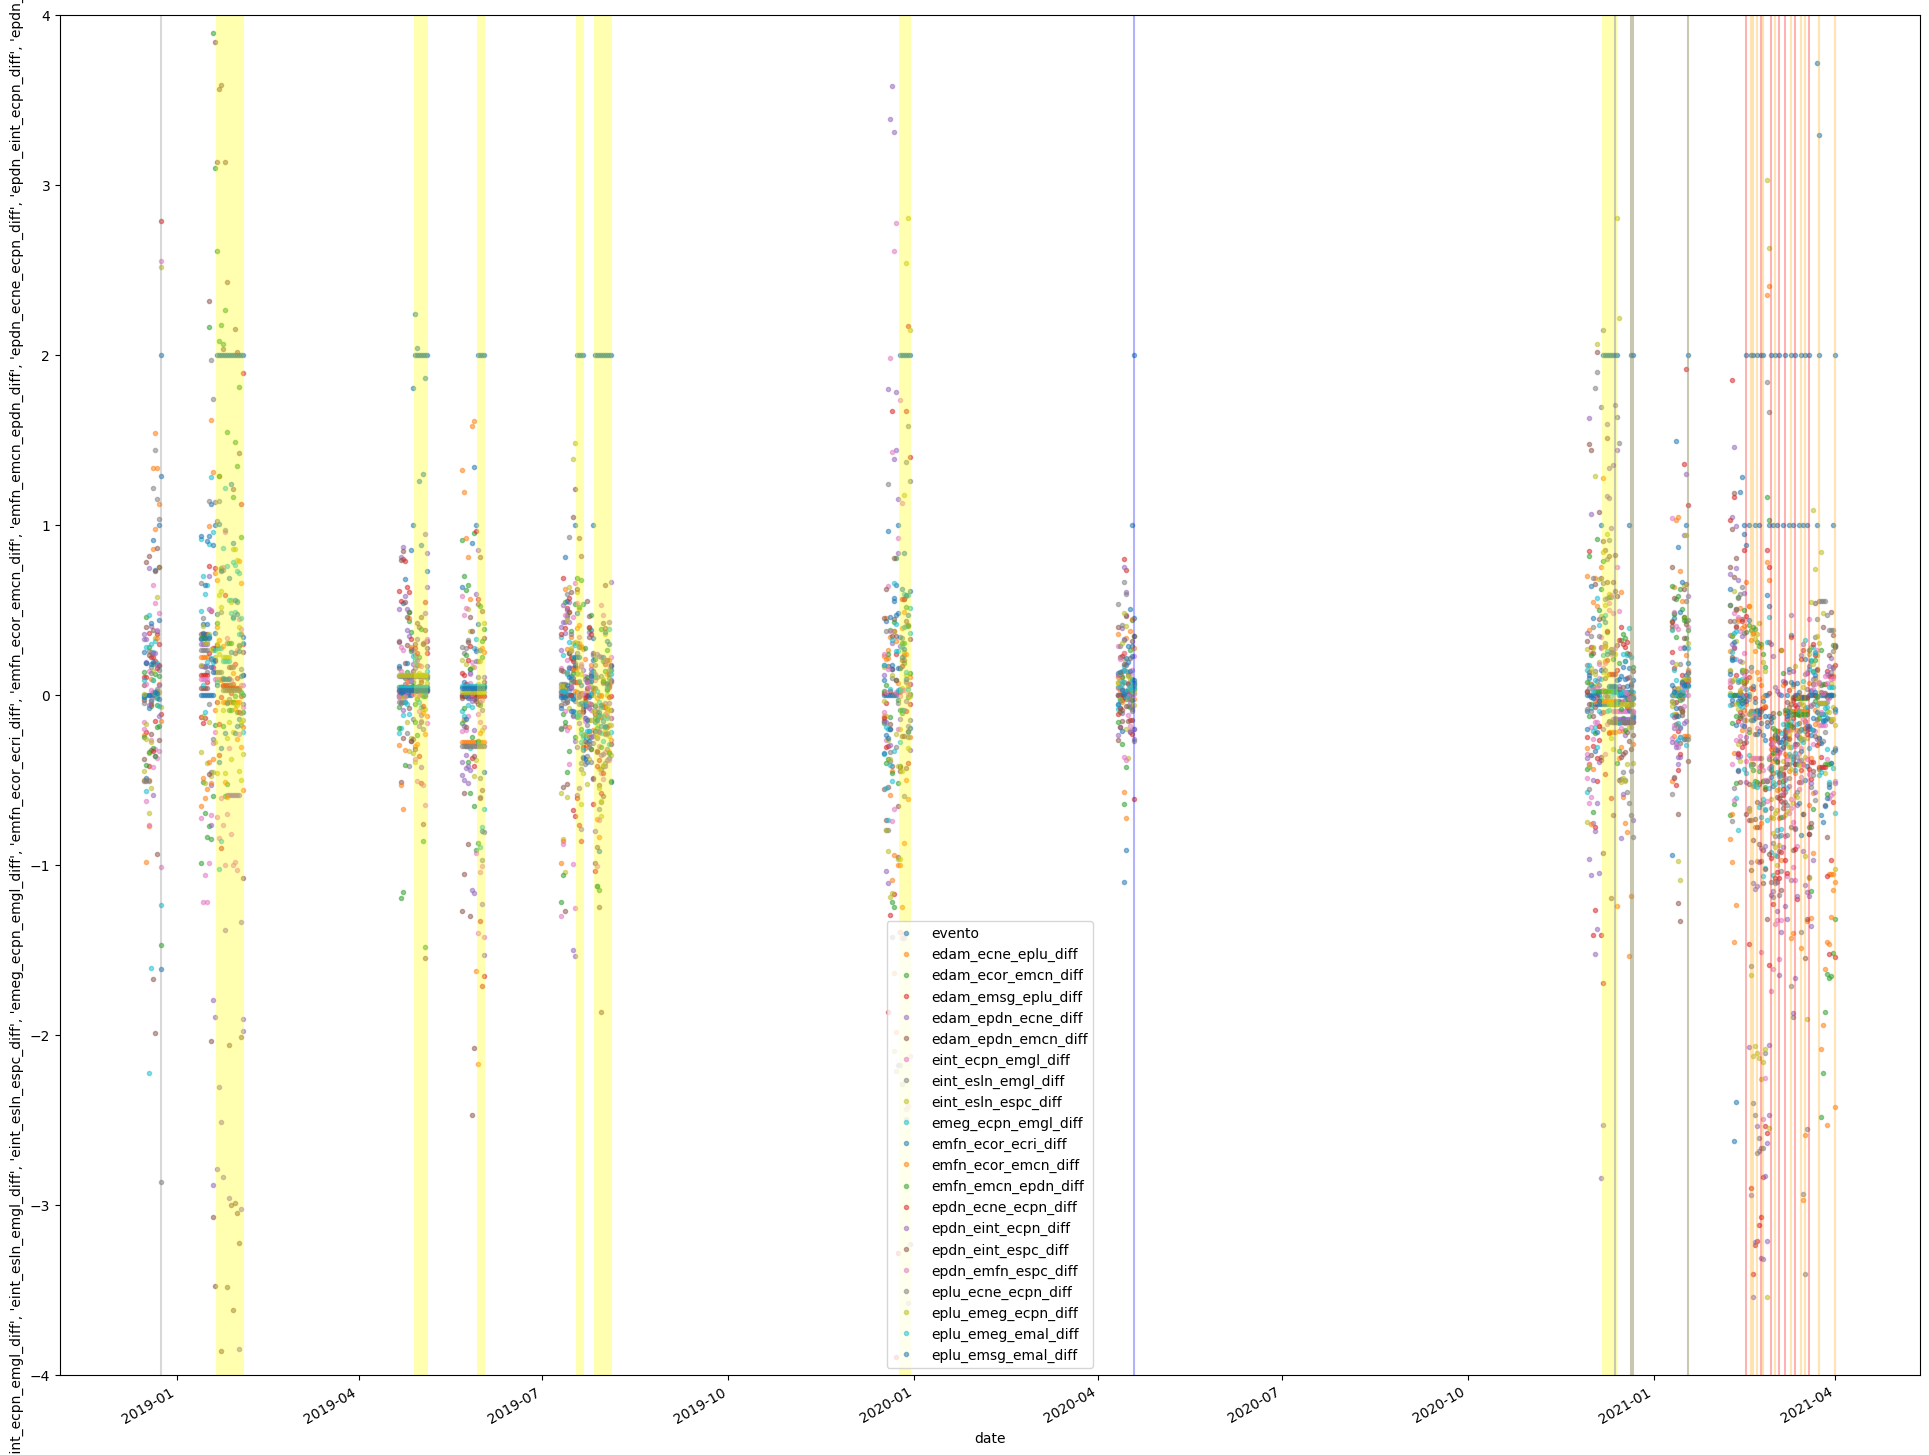

In [206]:
df.plot(figsize=(24,20), marker = ".", linewidth=0, alpha = 0.5)
plt.xlabel('date')
plt.ylabel([
    'edam_ecne_eplu_diff',
    'edam_ecor_emcn_diff',
    'edam_emsg_eplu_diff',
    'edam_epdn_ecne_diff',
    'edam_epdn_emcn_diff',
    'eint_ecpn_emgl_diff',
    'eint_esln_emgl_diff',
    'eint_esln_espc_diff',
    'emeg_ecpn_emgl_diff',
    'emfn_ecor_ecri_diff',
    'emfn_ecor_emcn_diff',
    'emfn_emcn_epdn_diff',
    'epdn_ecne_ecpn_diff',
    'epdn_eint_ecpn_diff',
    'epdn_eint_espc_diff',
    'epdn_emfn_espc_diff',
    'eplu_ecne_ecpn_diff',
    'eplu_emeg_ecpn_diff',
    'eplu_emeg_emal_diff',
    'eplu_emsg_emal_diff'
])

plt.ylim(-4, 4)

events_alpha = 0.3

for f in LF:
    plt.axvline(x=f, color='orange', alpha = events_alpha)

for f in LSLF:
    plt.axvline(x=f, color='red', alpha = events_alpha)

for f in TA:
    plt.axvline(x=f, color='blue', alpha = events_alpha)

for f in EA:
    plt.axvline(x=f, color='yellow', alpha = events_alpha)

for f in DI:
    plt.axvline(x=f, color='gray', alpha = events_alpha)

plt.show()


In [169]:
import numpy as np
from  sklearn import datasets
from  sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [254]:
# preparazione dataset
#iris = datasets.load_iris()
#print(iris.target)
#X = iris.data[:, [2, 3]]
#y = iris.target

X = df.values[:, [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]]
y = _dftarget

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train = X[:185]
X_test = X[185:]

y_train = y[:185]
y_test = y[185:]

print(y_test)

[0 0 0 0 0 0 1 2]


In [255]:
# standardizzazione
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_std = sc.transform(X)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [256]:
# addestramento
from  sklearn.linear_model import LogisticRegression
#lr = LogisticRegression(C=1000.0, random_state=0, class_weight='balanced') #parametro C è l'inverso della regolarizzazione; pertanto, se riduco il valore C, incremento la regolarizzazione; e viceversa
lr = LogisticRegression(C=1000.0, random_state=0) #parametro C è l'inverso della regolarizzazione; pertanto, se riduco il valore C, incremento la regolarizzazione; e viceversa
lr.fit(X_train_std, y_train)


LogisticRegression(C=1000.0, random_state=0)

In [257]:
for i in range(0,len(X_test_std)):
  z = np.array([X_test_std[i]])
  y = lr.predict(z)
  print((i+1) , y_test[i], y, y_test[i] == y)

1 0 [0] [ True]
2 0 [0] [ True]
3 0 [0] [ True]
4 0 [2] [False]
5 0 [2] [False]
6 0 [2] [False]
7 1 [2] [False]
8 2 [0] [False]


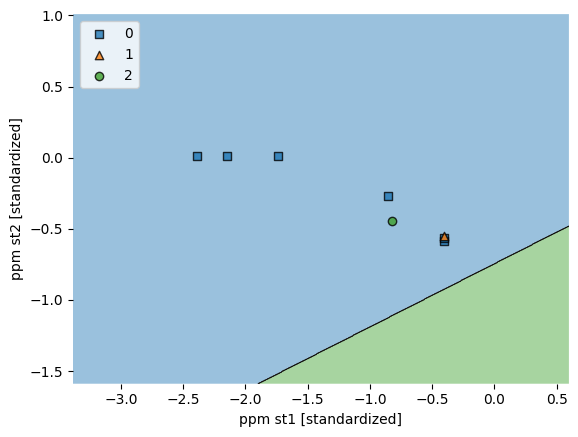

In [248]:
# visualizzazione grafica della classificazione
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_test_std, y_test, clf=lr, legend=2)
import matplotlib.pyplot as plt
plt.xlabel('ppm st1 [standardized]')
plt.ylabel('ppm st2 [standardized]')
plt.legend(loc='upper left')
plt.show()